Accuracy: 0.96055
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18297
           1       0.87      0.63      0.73      1703

    accuracy                           0.96     20000
   macro avg       0.92      0.81      0.85     20000
weighted avg       0.96      0.96      0.96     20000

Confusion Matrix:
 [[18138   159]
 [  630  1073]]


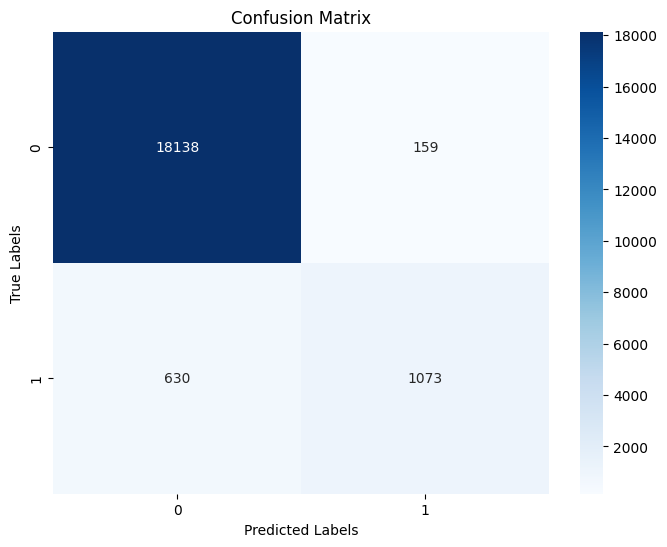

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Data Loading
data = pd.read_csv('/content/diabetes_dataset_with_notes.csv')

# 2. Data Preprocessing
X = data.drop(['diabetes', 'clinical_notes'], axis=1)
y = data['diabetes']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=np.number).columns

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data, transform the test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# 3. Model Training (Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 4. Evaluation
y_pred = model.predict(X_test)

# Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 5. Visualization (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
